In [1]:
import pandas as pd
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df = pd.read_excel("fox_data.xlsx")

In [4]:
df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,Obama,Approve,0.44,0.78,0.10,0.37,0.41,0.47,0.35,0.85,...,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15
1,Obama,Disapprove,0.50,0.17,0.86,0.53,0.53,0.47,0.60,0.07,...,0.52,0.36,0.60,0.50,0.52,0.46,0.52,0.24,0.72,0.82
2,Obama,Don't know,0.06,0.05,0.04,0.10,0.05,0.06,0.05,0.08,...,0.06,0.08,0.04,0.05,0.05,0.05,0.05,0.06,0.04,0.02
3,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
4,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
5,Iran Negotiations,Not very confident,0.19,0.11,0.26,0.22,0.18,0.19,0.21,0.06,...,0.22,0.23,0.20,0.15,0.14,0.16,0.20,0.16,0.22,0.16
6,Iran Negotiations,Not at all confident,0.31,0.08,0.57,0.32,0.35,0.27,0.37,0.05,...,0.32,0.17,0.38,0.34,0.40,0.29,0.32,0.11,0.47,0.67
7,Iran Negotiations,Don't know,0.02,0.04,0.01,0.02,0.02,0.02,0.02,0.05,...,0.03,0.03,NaN,0.03,0.02,0.03,0.01,0.01,0.02,NaN
8,Iran Deal,Favor,0.47,0.60,0.34,0.44,0.46,0.47,0.45,0.54,...,0.45,0.51,0.46,0.45,0.41,0.47,0.48,0.61,0.35,0.35
9,Iran Deal,Oppose,0.43,0.26,0.60,0.49,0.48,0.39,0.46,0.31,...,0.45,0.37,0.47,0.44,0.49,0.45,0.41,0.28,0.56,0.61


In [5]:
negs_df = df[df['Subject'] == 'Iran Negotiations']

In [6]:
negs_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
3,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
4,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
5,Iran Negotiations,Not very confident,0.19,0.11,0.26,0.22,0.18,0.19,0.21,0.06,...,0.22,0.23,0.20,0.15,0.14,0.16,0.20,0.16,0.22,0.16
6,Iran Negotiations,Not at all confident,0.31,0.08,0.57,0.32,0.35,0.27,0.37,0.05,...,0.32,0.17,0.38,0.34,0.40,0.29,0.32,0.11,0.47,0.67
7,Iran Negotiations,Don't know,0.02,0.04,0.01,0.02,0.02,0.02,0.02,0.05,...,0.03,0.03,NaN,0.03,0.02,0.03,0.01,0.01,0.02,NaN


In [7]:
very_confident_df = negs_df[negs_df['Response'] == 'Very confident']

In [8]:
very_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
3,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.1,0.06


In [9]:
somewhat_confident_df = negs_df[negs_df['Response'] == 'Somewhat confident']

In [10]:
somewhat_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
4,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11


In [43]:
confident_df = very_confident_df.append(somewhat_confident_df)

In [44]:
confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
3,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
4,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11


In [45]:
new_confident_df = confident_df.append(confident_df.sum(numeric_only=True), ignore_index=True)

In [46]:
new_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
1,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
2,NaN,NaN,0.48,0.78,0.17,0.44,0.45,0.52,0.40,0.83,...,0.43,0.57,0.42,0.48,0.44,0.52,0.47,0.72,0.29,0.17


In [47]:
final_confident_df = new_confident_df.set_value(2, 'Subject', 'Iran Negotiations')

In [48]:
final_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
1,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
2,Iran Negotiations,NaN,0.48,0.78,0.17,0.44,0.45,0.52,0.40,0.83,...,0.43,0.57,0.42,0.48,0.44,0.52,0.47,0.72,0.29,0.17


In [59]:
final_confident_df = new_confident_df.set_value(2, 'Response', 'Total')

In [60]:
final_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,Iran Negotiations,Very confident,0.17,0.29,0.04,0.15,0.17,0.17,0.11,0.37,...,0.14,0.18,0.13,0.19,0.18,0.18,0.16,0.24,0.10,0.06
1,Iran Negotiations,Somewhat confident,0.31,0.49,0.13,0.29,0.28,0.35,0.29,0.46,...,0.29,0.39,0.29,0.29,0.26,0.34,0.31,0.48,0.19,0.11
2,Iran Negotiations,Total,0.48,0.78,0.17,0.44,0.45,0.52,0.40,0.83,...,0.43,0.57,0.42,0.48,0.44,0.52,0.47,0.72,0.29,0.17


In [61]:
super_final_confident_df = final_confident_df[final_confident_df['Response'] == 'Total']

In [62]:
super_final_confident_df

,Subject,Response,Total,Dem,Rep,Ind,Men,Women,White,Black,...,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
2,Iran Negotiations,Total,0.48,0.78,0.17,0.44,0.45,0.52,0.4,0.83,...,0.43,0.57,0.42,0.48,0.44,0.52,0.47,0.72,0.29,0.17


In [68]:
del super_final_confident_df['Subject']

In [69]:
del super_final_confident_df['Response']

In [73]:
del super_final_confident_df['Total']

In [77]:
obama_df = df[df['Subject'] == 'Obama']

In [79]:
obama_approve_df = obama_df[obama_df['Response'] == 'Approve']

In [81]:
del obama_approve_df['Subject']

In [82]:
del obama_approve_df['Response']

In [83]:
del obama_approve_df['Total']

In [84]:
obama_approve_df

,Dem,Rep,Ind,Men,Women,White,Black,College_Degree,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,0.78,0.1,0.37,0.41,0.47,0.35,0.85,0.47,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15


In [107]:
plottable_df = obama_approve_df.append(super_final_confident_df)

In [108]:
plottable_df

,Dem,Rep,Ind,Men,Women,White,Black,College_Degree,No_Degree,Under_35,between_35_and_54,Over_55,Over_65,Under_50k,Over_50k,Lib,Cons,Tea_Party
0,0.78,0.10,0.37,0.41,0.47,0.35,0.85,0.47,0.43,0.56,0.35,0.45,0.43,0.48,0.42,0.69,0.24,0.15
2,0.78,0.17,0.44,0.45,0.52,0.40,0.83,0.55,0.43,0.57,0.42,0.48,0.44,0.52,0.47,0.72,0.29,0.17


In [112]:
final_plottable_df = plottable_df.transpose()

In [119]:
final_plottable_df.columns = ['Total_Obama_Approve', 'Total_Iran_Negotiations']

In [120]:
final_plottable_df

,Total_Obama_Approve,Total_Iran_Negotiations
Dem,0.78,0.78
Rep,0.10,0.17
Ind,0.37,0.44
Men,0.41,0.45
Women,0.47,0.52
White,0.35,0.40
Black,0.85,0.83
College_Degree,0.47,0.55
No_Degree,0.43,0.43
Under_35,0.56,0.57


In [125]:
lm = smf.ols(formula='Total_Iran_Negotiations ~ Total_Obama_Approve',data=final_plottable_df).fit()
lm.params

Intercept              0.074581
Total_Obama_Approve    0.913442
dtype: float64

In [126]:
intercept, slope = lm.params

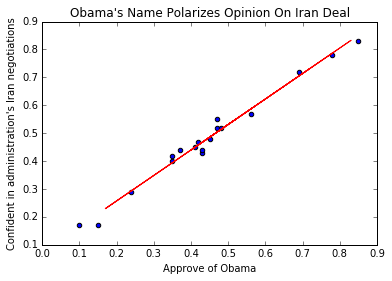

In [127]:
ax = final_plottable_df.plot(kind='scatter', x= 'Total_Obama_Approve', y='Total_Iran_Negotiations')
plt.plot(final_plottable_df["Total_Iran_Negotiations"],slope*final_plottable_df["Total_Iran_Negotiations"]+intercept,"-",color="red")
ax.set_title("Obama's Name Polarizes Opinion On Iran Deal")
ax.set_ylabel('Confident in administration\'s Iran negotiations')
ax.set_xlabel("Approve of Obama")